In [11]:
############ For COBRE FC #############
import pandas as pd
import numpy as np
import glob
from nilearn.connectome import ConnectivityMeasure
import warnings
warnings.filterwarnings('ignore')

wkDir = '/media/garlicseed/data2/Schizophrenia/COBRE/'
outDir = '/media/garlicseed/data2/Schizophrenia/COBRE/FC/'
 
# connectivity setting
con_method = "covariance"  # {"covariance", "correlation", "partial correlation", "tangent", "precision"}, 
cor_measure = ConnectivityMeasure(kind=con_method)

# 获取连接矩阵的文件名
file_names = sorted(glob.glob(wkDir + 'derivate_COBRE_prep/fmriprep/timeseries_for_schaefer400_independent_z/*_timeseries_schaefer400.csv'))
print(f"总共有{len(file_names)}个被试")

# 初始化存储所有被试FC矩阵的数组
all_fc_matrices = []

# 处理每个被试的数据
for i, file_name in enumerate(file_names):
    # 加载时间序列数据
    matrix_tmp = np.loadtxt(file_name, delimiter=',')
    # 计算功能连接矩阵
    fc_matrix = cor_measure.fit_transform([matrix_tmp])[0]
    fc_matrix = np.arctanh(fc_matrix)
    np.fill_diagonal(fc_matrix, 0)
     # replace inf with 0
    fc_matrix[~np.isfinite(fc_matrix)] = 0
    # 添加到列表
    all_fc_matrices.append(fc_matrix)
    
    # 打印进度
    if (i+1) % 10 == 0:
        print(f"已处理 {i+1}/{len(file_names)} 个被试")

# 将列表转换为numpy数组 (应该是162×400×400的形状)
all_fc_matrices = np.array(all_fc_matrices)
print(f"所有FC矩阵的形状: {all_fc_matrices.shape}")

# 保存所有被试的FC矩阵
np.save(outDir+'all_subject_fc_matrices.npy', all_fc_matrices)

# 计算组平均连接矩阵
group_con_mat = np.mean(all_fc_matrices, axis=0)

# 导出组平均连接矩阵
np.savetxt(outDir+'group_mean_connectivity.csv', group_con_mat, delimiter=",")
print("处理完成!")

总共有162个被试
已处理 10/162 个被试
已处理 20/162 个被试
已处理 30/162 个被试
已处理 40/162 个被试
已处理 50/162 个被试
已处理 60/162 个被试
已处理 70/162 个被试
已处理 80/162 个被试
已处理 90/162 个被试
已处理 100/162 个被试
已处理 110/162 个被试
已处理 120/162 个被试
已处理 130/162 个被试
已处理 140/162 个被试
已处理 150/162 个被试
已处理 160/162 个被试
所有FC矩阵的形状: (162, 400, 400)
处理完成!


In [12]:
############ For UCLA FC #############
import pandas as pd
import numpy as np
import glob
from nilearn.connectome import ConnectivityMeasure
import warnings
warnings.filterwarnings('ignore')

wkDir = '/media/garlicseed/data2/Schizophrenia/ucla/'
outDir = '/media/garlicseed/data2/Schizophrenia/ucla/FC/'
 
# connectivity setting
con_method = "covariance"  # {"covariance", "correlation", "partial correlation", "tangent", "precision"}, 
cor_measure = ConnectivityMeasure(kind=con_method)

# 获取连接矩阵的文件名
file_names = sorted(glob.glob(wkDir + 'derivate_ucla_prep/fmriprep/timeseries_for_schaefer400_independent_z/*_timeseries_schaefer400.csv'))
print(f"总共有{len(file_names)}个被试")

# 初始化存储所有被试FC矩阵的数组
all_fc_matrices = []

# 处理每个被试的数据
for i, file_name in enumerate(file_names):
    # 加载时间序列数据
    matrix_tmp = np.loadtxt(file_name, delimiter=',')
    # 计算功能连接矩阵
    fc_matrix = cor_measure.fit_transform([matrix_tmp])[0]

    fc_matrix = np.arctanh(fc_matrix)
    np.fill_diagonal(fc_matrix, 0)
     # replace inf with 0
    fc_matrix[~np.isfinite(fc_matrix)] = 0    
    # 添加到列表
    all_fc_matrices.append(fc_matrix)
    
    # 打印进度
    if (i+1) % 10 == 0:
        print(f"已处理 {i+1}/{len(file_names)} 个被试")

# 将列表转换为numpy数组 (应该是162×400×400的形状)
all_fc_matrices = np.array(all_fc_matrices)
print(f"所有FC矩阵的形状: {all_fc_matrices.shape}")

# 保存所有被试的FC矩阵
np.save(outDir+'all_subject_fc_matrices.npy', all_fc_matrices)

# 计算组平均连接矩阵
group_con_mat = np.mean(all_fc_matrices, axis=0)

# 导出组平均连接矩阵
np.savetxt(outDir+'group_mean_connectivity.csv', group_con_mat, delimiter=",")
print("处理完成!")

总共有170个被试
已处理 10/170 个被试
已处理 20/170 个被试
已处理 30/170 个被试
已处理 40/170 个被试
已处理 50/170 个被试
已处理 60/170 个被试
已处理 70/170 个被试
已处理 80/170 个被试
已处理 90/170 个被试
已处理 100/170 个被试
已处理 110/170 个被试
已处理 120/170 个被试
已处理 130/170 个被试
已处理 140/170 个被试
已处理 150/170 个被试
已处理 160/170 个被试
已处理 170/170 个被试
所有FC矩阵的形状: (170, 400, 400)
处理完成!


In [13]:
import numpy as np
import os

# 定义文件路径
ucla_fc_path = '/media/garlicseed/data2/Schizophrenia/ucla/FC/all_subject_fc_matrices.npy'
cobre_fc_path = '/media/garlicseed/data2/Schizophrenia/COBRE/FC/all_subject_fc_matrices.npy'
output_dir = '/media/garlicseed/data2/Schizophrenia/FC_train/'
output_path = os.path.join(output_dir, 'fc_matrices.npy')
os.makedirs(output_dir, exist_ok=True)
ucla_data = np.load(ucla_fc_path)
cobre_data = np.load(cobre_fc_path)
fc_stack = np.concatenate([cobre_data,ucla_data], axis=0)
np.save(output_path, fc_stack)

print("完成!")

完成!


In [1]:
########### for cobre GD ##############
import os
import glob
import numpy as np
import nibabel as nib
atlas='schaefer-400' 
micapipe='/media/garlicseed/data2/Schizophrenia' # <<<<<<<<<<<< CHANGE THIS PATH
subj_dir = '/media/garlicseed/data2/Schizophrenia/COBRE/derivate_COBRE/micapipe_v0.2.0'
# Load LEFT annotation file in fsaverage5
annot_lh_fs5= nib.freesurfer.read_annot(f'{micapipe}/parcellations/lh.{atlas}_mics.annot')

# Unique number of labels of a given atlas
Ndim = max(np.unique(annot_lh_fs5[0]))
path_list = os.listdir(subj_dir)
path_list.sort()
# Remove the two files
files_to_remove = ['dataset_description.json', 'micapipe_processed_sub.csv','aa.sh','mophormetric.sh',
                   'subjList.txt','sub-010','sub-041','sub-053']
path_list = [item for item in path_list if item not in files_to_remove]
#path_list = ['sub-001','sub-002']
gd_matrices = []
sub_list = []
sub_list_gd = []
for sub in path_list: 
    if os.path.exists(f'{subj_dir}/{sub}'):        
        print('---------------- executing: '+sub+' ----------------')    
        subjectDir=f'{subj_dir}/{sub}'
        sub_list_gd.append(sub.split("-")[1])
        sub_list.append(sub)

        gd_file = f'{subjectDir}/dist/{sub}_atlas-{atlas}_GD.shape.gii'
        
        mtx_gd = nib.load(gd_file).darrays[0].data

        mtx_gd = np.delete(np.delete(mtx_gd, 0, axis=0), 0, axis=1)
        GD = np.delete(np.delete(mtx_gd, Ndim, axis=0), Ndim, axis=1)
        gd_matrices.append(GD)

    gd_stack_cobre = np.stack(gd_matrices, axis=0) 
    
    
########### for ucla GD ##############
atlas='schaefer-400' 
micapipe='/media/garlicseed/data2/Schizophrenia' # <<<<<<<<<<<< CHANGE THIS PATH
subj_dir = '/media/garlicseed/data2/Schizophrenia/ucla/derivate_ucla/micapipe_v0.2.0'
# Load LEFT annotation file in fsaverage5
annot_lh_fs5= nib.freesurfer.read_annot(f'{micapipe}/parcellations/lh.{atlas}_mics.annot')

# Unique number of labels of a given atlas
Ndim = max(np.unique(annot_lh_fs5[0]))
path_list = os.listdir(subj_dir)
path_list.sort()
# Remove the two files
files_to_remove = ['dataset_description.json', 'micapipe_processed_sub.csv','aa.sh','mophormetric.sh',
                   'subjList.txt','sub-131','participants.tsv']
path_list = [item for item in path_list if item not in files_to_remove]
#path_list = ['sub-001','sub-002']
gd_matrices = []
sub_list = []
sub_list_gd = []
for sub in path_list: 
    if os.path.exists(f'{subj_dir}/{sub}'):        
        print('---------------- executing: '+sub+' ----------------')    
        subjectDir=f'{subj_dir}/{sub}'
        sub_list_gd.append(sub.split("-")[1])
        sub_list.append(sub)

        gd_file = f'{subjectDir}/dist/{sub}_atlas-{atlas}_GD.shape.gii'
        
        mtx_gd = nib.load(gd_file).darrays[0].data

        mtx_gd = np.delete(np.delete(mtx_gd, 0, axis=0), 0, axis=1)
        GD = np.delete(np.delete(mtx_gd, Ndim, axis=0), Ndim, axis=1)
        gd_matrices.append(GD)

    gd_stack_ucla = np.stack(gd_matrices, axis=0) 
    
gd_stack = np.concatenate([gd_stack_cobre,gd_stack_ucla], axis=0)
print(f"所有GD矩阵的形状: {gd_stack.shape}")

---------------- executing: sub-001 ----------------
---------------- executing: sub-002 ----------------
---------------- executing: sub-003 ----------------
---------------- executing: sub-004 ----------------
---------------- executing: sub-005 ----------------
---------------- executing: sub-006 ----------------
---------------- executing: sub-007 ----------------
---------------- executing: sub-008 ----------------
---------------- executing: sub-009 ----------------
---------------- executing: sub-011 ----------------
---------------- executing: sub-012 ----------------
---------------- executing: sub-013 ----------------
---------------- executing: sub-014 ----------------
---------------- executing: sub-015 ----------------
---------------- executing: sub-016 ----------------
---------------- executing: sub-017 ----------------
---------------- executing: sub-018 ----------------
---------------- executing: sub-019 ----------------
---------------- executing: sub-020 ----------

---------------- executing: sub-159 ----------------
---------------- executing: sub-160 ----------------
---------------- executing: sub-161 ----------------
---------------- executing: sub-162 ----------------
---------------- executing: sub-163 ----------------
---------------- executing: sub-164 ----------------
---------------- executing: sub-165 ----------------
---------------- executing: sub-001 ----------------
---------------- executing: sub-002 ----------------
---------------- executing: sub-003 ----------------
---------------- executing: sub-005 ----------------
---------------- executing: sub-006 ----------------
---------------- executing: sub-007 ----------------
---------------- executing: sub-008 ----------------
---------------- executing: sub-009 ----------------
---------------- executing: sub-010 ----------------
---------------- executing: sub-011 ----------------
---------------- executing: sub-013 ----------------
---------------- executing: sub-014 ----------

---------------- executing: sub-159 ----------------
---------------- executing: sub-160 ----------------
---------------- executing: sub-161 ----------------
---------------- executing: sub-162 ----------------
---------------- executing: sub-163 ----------------
---------------- executing: sub-164 ----------------
---------------- executing: sub-165 ----------------
---------------- executing: sub-166 ----------------
---------------- executing: sub-167 ----------------
---------------- executing: sub-168 ----------------
---------------- executing: sub-169 ----------------
---------------- executing: sub-170 ----------------
---------------- executing: sub-171 ----------------
---------------- executing: sub-172 ----------------
---------------- executing: sub-173 ----------------
---------------- executing: sub-174 ----------------
---------------- executing: sub-175 ----------------
---------------- executing: sub-176 ----------------
---------------- executing: sub-177 ----------

In [2]:
#for geodesic distance
fc_stack = np.load(f'/media/garlicseed/data2/Schizophrenia//FC_train/fc_matrices.npy')
# list that will contain the mean top geodesic distances for all subjects (N x 400)
mean_geodesic_distances = []


# iterate over subjects
for i in range(gd_stack.shape[0]):

    # temporary list for each subject's mean top geodesic distances
    sub_mean_geodesic_distances = []

    # iterate over each row of the subject's geodesic distance 400x400 matrix 
    for j in range(len(gd_stack[0])):

        # identify the indices of the top 10% functional connections (!) i.e., top 20 connections (10% of 200 (400/2) given that geodesic distance was calculated across single hemispheres only)
        # code explanation available at: https://www.educative.io/answers/how-to-get-indices-of-n-maximum-values-in-numpy-arrays
        # retrieving indices from subject i and row j of the fc matrix
        
        # if left hemisphere
        if j <= 199:
            # take top funnctional connections from left hemisphere
            indices_top_fc = np.argsort(fc_stack[i][j][:200])[::-1][:20] #indices_top_fc = np.argsort(np.abs(fc_stack[i][j][:200]))[::-1][:20] #np.argsort(fc_stack[i][j][:200])[::-1][:20]
            #注意这里使用的是绝对值，下次只使用正值试试
        else:
            # take top funnctional connections from right hemisphere (need to add 200 to the indices outputted given that we are taking them from 200-parcel right hemisphere but applying them to 400 array in geodesic_distances_matrices_corrected)
            indices_top_fc = 200 + np.argsort(fc_stack[i][j][200:])[::-1][:20] #indices_top_fc = 200 + np.argsort(np.abs(fc_stack[i][j][200:]))[::-1][:20]
            

        # take the mean of the highest 10% (so 20) geodesic distances (!) for subject i and row j of the geodesic distance matrix
        mean_top_geo = np.mean(gd_stack[i][j][indices_top_fc])

        # append mean of top geodesic distances to the subject's temporary list
        sub_mean_geodesic_distances.append(mean_top_geo)

    # append current subject's list of mean of top geodesic distances to list containing all subjects
    mean_geodesic_distances.append(sub_mean_geodesic_distances)
            
            
mean_geodesic_distances = np.array(mean_geodesic_distances)
print(f"所有GD矩阵的形状: {mean_geodesic_distances.shape}")
np.savetxt('/media/garlicseed/data2/Schizophrenia/GD_train/mean_geodesic_distances.csv', mean_geodesic_distances, delimiter=',', fmt = '%.16g', comments = '')

所有GD矩阵的形状: (332, 400)


In [6]:
def plot_functional_matrix(fc_matrix, 
                           colormap='viridis', 
                           bar_thickness=20,down_lim=0, top_lim=1):
    """
    Plot a functional connectivity matrix with network color bars.

    Parameters:
    - fc_matrix : np.ndarray
        The functional connectivity matrix to be plotted.
    - network_affiliation_file : str
        File path to the network affiliation data (1D array).
    - color_palette : dict
        Dictionary mapping network labels to their corresponding colors.
    - colormap : str or matplotlib.colors.Colormap, optional
        Colormap to use for the heatmap. Default is 'viridis'.
    - bar_thickness : int, optional
        Thickness of the color bars. Default is 20.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    from matplotlib.patches import Rectangle
    # Load network affiliation data
    yeo7_networks_array = np.genfromtxt('/media/garlicseed/data2/Schizophrenia/surfaces/schaefer400x7CommunityAffiliation.1D', delimiter=',', skip_header=0)

    # Create separate labels for left and right hemispheres
    yeo7_networks_array_labels = []
    for i, val in enumerate(yeo7_networks_array):
        if i < 200:  # First 200 are left hemisphere
            prefix = "LH"
        else:  # Last 200 are right hemisphere
            prefix = "RH"

        if val == 1:
            yeo7_networks_array_labels.append(f'{prefix}_visual')
        elif val == 2:
            yeo7_networks_array_labels.append(f'{prefix}_sensory_motor')
        elif val == 3:
            yeo7_networks_array_labels.append(f'{prefix}_dorsal_attention')
        elif val == 4:
            yeo7_networks_array_labels.append(f'{prefix}_ventral_attention')
        elif val == 5:
            yeo7_networks_array_labels.append(f'{prefix}_limbic')
        elif val == 6:
            yeo7_networks_array_labels.append(f'{prefix}_fronto_parietal')
        elif val == 7:
            yeo7_networks_array_labels.append(f'{prefix}_DMN')
    yeo7_networks_array_labels = np.asarray(yeo7_networks_array_labels)

    # Network names with left and right hemisphere labels
    network_names = [
        "LH_visual", "LH_sensory_motor", "LH_dorsal_attention", "LH_ventral_attention", "LH_limbic", "LH_fronto_parietal", "LH_DMN",
        "RH_visual", "RH_sensory_motor", "RH_dorsal_attention", "RH_ventral_attention", "RH_limbic", "RH_fronto_parietal", "RH_DMN"
    ]

    # Update color palette for left and right hemispheres
    palette_labeled_networks = {
        'LH_visual': 'darkorchid',
        'LH_sensory_motor': 'steelblue',
        'LH_dorsal_attention': 'forestgreen',
        'LH_ventral_attention': 'orchid',
        'LH_limbic': 'lemonchiffon',
        'LH_fronto_parietal': 'orange',
        'LH_DMN': 'indianred',
        'RH_visual': 'darkorchid',
        'RH_sensory_motor': 'steelblue',
        'RH_dorsal_attention': 'forestgreen',
        'RH_ventral_attention': 'orchid',
        'RH_limbic': 'lemonchiffon',
        'RH_fronto_parietal': 'orange',
        'RH_DMN': 'indianred'
    }


    # Calculate the boundaries of each network
    unique_networks, indices, network_counts = np.unique(yeo7_networks_array_labels, return_index=True, return_counts=True)
    sorted_indices = np.argsort(indices)  # Sort by original indices
    unique_networks = unique_networks[sorted_indices]
    network_counts = network_counts[sorted_indices]
    network_boundaries = np.cumsum(network_counts)
    network_boundaries = np.insert(network_boundaries, 0, 0)

    # Function to add color bars
    def add_colorbar(ax, boundaries, labels, colors, orientation='top', bar_thickness=10):
        for i in range(len(boundaries) - 1):
            start = boundaries[i]
            end = boundaries[i + 1]
            network_name = labels[start]
            color = colors[network_name]

            if orientation == 'top':
                rect = Rectangle((start, -bar_thickness), end - start, bar_thickness, facecolor=color, edgecolor='none')
                ax.add_patch(rect)
            elif orientation == 'left':
                rect = Rectangle((-bar_thickness, start), bar_thickness, end - start, facecolor=color, edgecolor='none')
                ax.add_patch(rect)

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(6, 6))

    # Display the functional connectivity matrix
    im = ax.imshow(fc_matrix, cmap=colormap)

    # Add color bars to the top and left
    add_colorbar(ax, network_boundaries, yeo7_networks_array_labels, palette_labeled_networks, orientation='top', bar_thickness=bar_thickness)
    add_colorbar(ax, network_boundaries, yeo7_networks_array_labels, palette_labeled_networks, orientation='left', bar_thickness=bar_thickness)

    # Add dividing lines between hemispheres
    ax.axhline(y=200, color='black', linewidth=0.6)
    ax.axhline(y=400, color='black', linewidth=0.6)
    ax.axvline(x=200, color='black', linewidth=0.6)
    ax.axvline(x=400, color='black', linewidth=0.6)

    # Add a colorbar for the heatmap
    cbar = fig.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
    cbar.mappable.set_clim(down_lim, top_lim)
    cbar.outline.set_visible(False)
    cbar.ax.tick_params(size=0)

    # Remove the heatmap border
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust plot limits to accommodate color bars
    ax.set_xlim(-bar_thickness, fc_matrix.shape[1])
    ax.set_ylim(fc_matrix.shape[0], -bar_thickness)

    # Remove ticks and labels from the main axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()

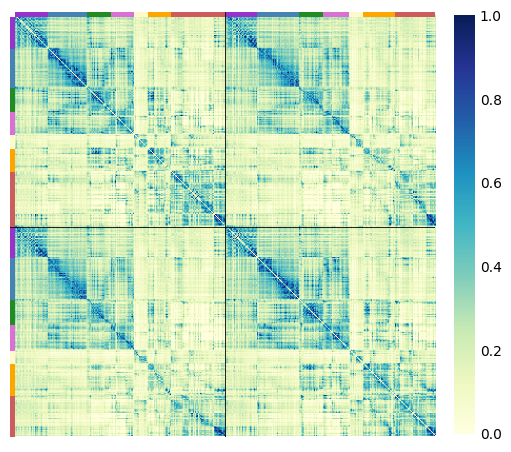

In [7]:
# plot funcational matrix for sch
sch_df = pd.read_csv('/media/garlicseed/data2/Schizophrenia/participants_train.tsv', sep='\t')
schz_mask = sch_df['diagnosis'] == 'SCHZ'
colorbar_colors = ['#FFFFDFFF', '#EDF8BFFF', '#C7E9B4FF', '#7FCDBBFF', 
          '#41B6C4FF', '#1D91C0FF', '#225EA8FF', '#253494FF', '#081D58FF']

from matplotlib.colors import LinearSegmentedColormap

# Create a custom linear colormap
continuous_cmap = LinearSegmentedColormap.from_list("continuous", colorbar_colors)
fc_stack_SCH = fc_stack[schz_mask] 
fc_stack_mean = np.mean(fc_stack_SCH, axis=0)
plot_functional_matrix(fc_stack_mean, colormap=continuous_cmap,bar_thickness=5)